## Homework 2: Wine Quality Prediction Using SGD
### Course: CS 474/574: Deep Learning/2021 Fall
### Due: 10/01/2021


Add your code to the following sections:

    ## add your code here
    #-----------------------

    #---------------------------------
    
Description: In this homework, you are going to practice cross-validation and implement the stochastic gradient optimization (mini-batch) to solve the wine quality prediction problem. Using the following code as your template. Specific requirements:

1. Use all function definitions given in the code (e.g., def SGD(X, Y, lr = 0.001, batch_size = 32, epoch = 100):); and do not change the function names and input arguments. (deduct 5 points for doing this)

2. Evaluate (Cross-validation) the model trained using GD (20 points)

3. SGD implementation. 40 pts
   
4. Calculate and print out the MSE and MAE values of SGD for the training and test sets (15 points)
5. Plot the loss curve of the SGD. (5 points)
6. Plot the mse curves on the training and test sets using different models (w_hist). (20 points)

### Common mistakes
    
1. Call GD and SGD using the whole dataset

    -- GD and SGD are used to optimize the model (learn w); and we should call them using the training sets
   
2. Calculate gradient using the whole training set for SGD
    
    -- In SGD, update gradient only using mini-batches
  
3. Calculate the loss of each epoch using the average of all minibatches
    
    -- should use the w of the last mini-batch and the whole training set to calculate the loss  
   
4. Mix concepts of loss function and evaulation metrics
    -- loss function: for optimization purpose (gradient). We use the sum of square errors in this homework. L = 1/2 * sum(y_hat_i - y_i)^2
    
    -- evaluation metrics: mse and mae: mse = 1/m * sum(y_hat_i - y_i)^2, mae = 1/m * sum(abs(y_hat_i - y_i))

### 1. Load data, implement the model, loss function and GD 

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## (1) Data preparation
df=pd.read_csv('winequality-white.csv', sep = ';')
df
X = df.values[:, :11]
Y = df.values[:, 11]
print('Data shape:', 'X:', X.shape, 'Y:', Y.shape)

# data normalization
min_vals = np.min(X, axis = 0)
max_vals = np.max(X, axis = 0)
X1 = (X-min_vals)/(max_vals-min_vals)

##(2) Assume a linear mode that y = w0*1 + w_1*x_1 +w_2*x_2+...+ w_11*x_11
def predict(X, w):
    '''
    X: input feature vectors:m*n
    w: weights
    
    return Y_hat
    '''
    # Prediction
    Y_hat = np.zeros((X.shape[0]))
    for idx, x in enumerate(X):          
        y_hat = w[0] + np.dot(w[1:].T, np.c_[x]) # linear model
        Y_hat[idx] = y_hat    
    return Y_hat

## (3) Loss function: L = 1/2 * sum(y_hat_i - y_i)^2
def loss(w, X, Y):
    '''
    w: weights
    X: input feature vectors
    Y: targets
    '''
    Y_hat = predict(X, w)
    loss = 1/2* np.sum(np.square(Y - Y_hat))
    
    return loss

# Optimization 1: Gradient Descent
def GD(X, Y, lr = 0.001, delta = 0.01, max_iter = 100):
    '''
    X: training data
    Y: training target
    lr: learning rate
    max_iter: the max iterations
    '''
    
    m = len(Y)
    b = np.reshape(Y, [Y.shape[0],1])
    w = np.random.rand(X.shape[1] + 1, 1)
    A = np.c_[np.ones((m, 1)), X]
    gradient = A.T.dot(np.dot(A, w)-b)
    
    loss_hist = np.zeros(max_iter) # history of loss
    w_hist = np.zeros((max_iter, w.shape[0])) # history of weight
    loss_w = 0
    i = 0                  
    while(np.linalg.norm(gradient) > delta) and (i < max_iter):
        w_hist[i,:] = w.T
        loss_w = loss(w, X, Y)
        print(i, 'loss:', loss_w)
        loss_hist[i] = loss_w
        
        w = w - lr*gradient        
        gradient = A.T.dot(np.dot(A, w)-b) # update the gradient using new w
        i = i + 1
        
    w_star = w  
    return w_star, loss_hist, w_hist

Data shape: X: (4898, 11) Y: (4898,)


### 2. Model evaluation using cross-validation (20 points)

In [4]:
## 2.1 Split the dataset into training (70%) and test (30%) sets. (5 points)
from sklearn.model_selection import train_test_split

## add your code here
#-----------------------
X_train, X_test, y_train, y_test =train_test_split(X1,Y, test_size = 0.30)

print(X_train.shape, X_test.shape)
#---------------------------------

(3428, 11) (1470, 11)


In [5]:
## 2.2 Model training using the training set and the GD function (5 points )
## add your code here
#-----------------------
w_star, loss_hist, w_hist = GD(X_train,y_train, lr=0.0001)
print(w_hist)
#---------------------------------

0 loss: 31680.13274413908
1 loss: 6236.226395514606
2 loss: 2192.9999370022088
3 loss: 1545.2063471210167
4 loss: 1436.2729398544618
5 loss: 1412.9938016090173
6 loss: 1403.4619852219093
7 loss: 1396.2645199306874
8 loss: 1389.5860717110743
9 loss: 1383.1341354082742
10 loss: 1376.857946211092
11 loss: 1370.7452280400476
12 loss: 1364.7899429953088
13 loss: 1358.987170590363
14 loss: 1353.3322913100587
15 loss: 1347.8208531850962
16 loss: 1342.4485468514104
17 loss: 1337.2111979400145
18 loss: 1332.1047623317108
19 loss: 1327.1253219780272
20 loss: 1322.2690809201645
21 loss: 1317.5323614441197
22 loss: 1312.911600358862
23 loss: 1308.4033453922707
24 loss: 1304.0042517008987
25 loss: 1299.7110784899205
26 loss: 1295.5206857397811
27 loss: 1291.4300310361737
28 loss: 1287.4361665000774
29 loss: 1283.5362358146956
30 loss: 1279.72747134623
31 loss: 1276.0071913555266
32 loss: 1272.3727972977233
33 loss: 1268.8217712071132
34 loss: 1265.3516731645382
35 loss: 1261.9601388446963
36 loss: 

In [6]:
## 2.3. calculating mse&mae values on the training set and test set, respectively. (10 points)

#training error
## add your code here
#-----------------------
y_train_hat = predict(X_train, w_star)
mse_train = (np.sum(np.square(y_train_hat-y_train)))/(X_train.shape[0])
mae_train = (np.sum(np.absolute(y_train_hat-y_train)))/(X_train.shape[0])
print('training mse: {} and training mae :{}'.format(mse_train, mae_train))
#---------------------------------


## test error
## add your code here
#-----------------------
y_test_hat = predict(X_test, w_star)
mse_test = (np.sum(np.square(y_test_hat-y_test)))/(X_test.shape[0])
mae_test = (np.sum(np.absolute(y_test_hat-y_test)))/(X_test.shape[0])
print('test mse: {} and test mae: {}'.format(mse_test, mae_test))
#---------------------------------
#training mse: 0.7867769198855628 and training mae:0.6927334108062077
#test mse: 0.8391500534666578 and test mae:0.714897056700805

training mse: 0.6642808129024048 and training mae :0.6313308898582243
test mse: 0.6890142836796471 and test mae: 0.6472715223174836


### 3. SGD implementation (40 points)
Use the SGD function definition given in the code (def SGD(X, Y, lr = 0.001, batch_size = 32, epoch = 100):); and do not change it.

In [7]:
from sklearn.utils import shuffle
def SGD(X, Y, lr = 0.001, batch_size = 32, epoch = 100): 
    '''Implement the minibatch Gradient Desent approach
    
        X: training data
        Y: training target
        lr: learning rate
        batch_size: batch size
        epoch: number of max epoches
        
        return: w_star, w_hist, loss_hist
    '''
    m = len(Y)
    np.random.seed(9)
    w = np.random.rand(X.shape[1]+1, 1)    #(12,1) values in [0, 1)
    w_hist = np.zeros((epoch, w.shape[0])) # (epoch,12) 
    loss_hist = np.zeros(epoch)            # (epoch,)
   
    
    ## add your code here
    #-----------------------
    for i in range(epoch):
        #(1) Shuffle data (X and Y) at the beginning of each epoch. (5 points)
        X_shuff, Y_shuff = shuffle(X,Y)
        #(2) go through all minibatches and update w. (30 points)
        for b in range(int(m/batch_size)): 
            # prepare the b mininath X_batch and Y_batch. 10 points
            X_batch = X_shuff[b*batch_size:(b+1)*batch_size]
            Y_batch = Y_shuff[b*batch_size:(b+1)*batch_size]
            #prepare A_batch and b_batch. 10 points
            A_batch = np.c_[np.ones((batch_size, 1)), X_batch]
            b_batch = np.reshape(Y_batch, [Y_batch.shape[0],1])
            #gradient calcualation and w update. 10 points
            gradient = A_batch.T.dot(np.dot(A_batch, w)-b_batch)
            w = w - lr*gradient
            #print(i, b, X_batch.shape, A_batch.shape)

            
            
        ## (3) Save the loss and current weight for each epoch. 5 points
        loss_hist[i] = loss(w, X_shuff, Y_shuff)
        w_hist[i,:] = w.T
        
        print(i, loss_hist[i])
        
        ##(4) Decay learning rate at the end of each epoch. 
        lr = lr * 0.9
    #---------------------------------
    
    w_star = w
    return w_star, w_hist, loss_hist  

### 4. Calculate and print out the MSE and MAE values of SGD for the training and test sets (15 points)

In [8]:
batch_size = 32
n_epochs = 50

#train model using SGD
w_star_SGD, w_hist_SGD, loss_hist_SGD = SGD(X_train, y_train, lr = 0.0001, batch_size = batch_size, epoch = n_epochs)

## add your code here
#------------------------------------------------------------
#(1) print out the predicted wine quality values and the true quality 
# values of the first 10 data samples in the test dataset.  5 points

Y_train_hat = predict(X_train, w_star_SGD)
Y_test_hat = predict(X_test, w_star_SGD)

for i in range(10):
    print('Predicted: {}    True: {}'.format(Y_test_hat[i], y_test[i]))

#(2) mse and mae of the training set. 5 points
mse_train = (np.sum(np.square(Y_train_hat-y_train)))/(X_train.shape[0])
mae_train = (np.sum(np.absolute(Y_train_hat-y_train)))/(X_train.shape[0])
print('training mse: {} and training mae :{}'.format(mse_train, mae_train))


#(3)mse and mae of the test set. 5 points
mse_test = (np.sum(np.square(Y_test_hat-y_test)))/(X_test.shape[0])
mae_test = (np.sum(np.absolute(Y_test_hat-y_test)))/(X_test.shape[0])
print('test mse: {} and test mae: {}'.format(mse_test, mae_test))
#-------------------------------------------------------------------
#Predicted: [6.  5.6 5.7 6.5 5.7 7.  6.7 6.2 5.7 5.8]
#True [5. 6. 7. 8. 5. 4. 6. 5. 7. 5.]
#training mse: 0.7218402431182253 and training mae:0.6595991336722727
#test mse: 0.7735707034736699 and test mae:0.6839863502607874

0 13434.286587114446
1 5383.011916986167
2 2820.361921850462
3 1912.9109116720188
4 1559.0159380833134
5 1409.1655864543427
6 1340.1681447982664
7 1306.3300546547862
8 1288.0186953593143
9 1277.7264697812616
10 1271.410512421924
11 1267.3433052328596
12 1264.7261336351198
13 1262.8376347370486
14 1261.4720038912901
15 1260.4362289431706
16 1259.5983476331887
17 1258.9362605659196
18 1258.3793620267043
19 1257.9221374149877
20 1257.5308235687207
21 1257.202954229621
22 1256.9111102724842
23 1256.6589824589746
24 1256.4373687132636
25 1256.2449605808529
26 1256.074875817415
27 1255.923654554331
28 1255.7894946866518
29 1255.6714702657414
30 1255.566816261577
31 1255.4723413467798
32 1255.3881219765954
33 1255.3133620265821
34 1255.2462054301145
35 1255.1862398122125
36 1255.1319937544035
37 1255.0839252172602
38 1255.0404388129366
39 1255.0023537468346
40 1254.967636835304
41 1254.93639877518
42 1254.9081202779416
43 1254.8828690383257
44 1254.8602800577198
45 1254.8398034120341
46 1254.

### 5. Plot the loss curve of the SGD. (5 points)

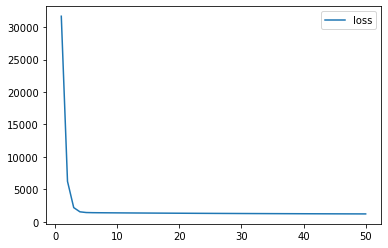

In [9]:
## add your code here
#-----------------------
plt.plot(range(1,n_epochs+1), loss_hist[:n_epochs], label="loss") # loss history is broken some how. didnt have time to fix
plt.legend()
plt.show()



#---------------------------------

### 6. Plot the mse curves on the training and test sets using different models (w_hist). (20 points)

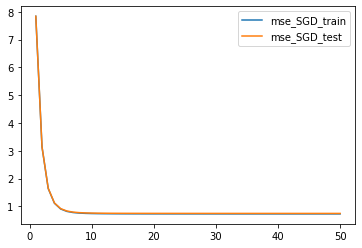

In [29]:
mse_SGD_train=np.zeros(n_epochs)
mse_SGD_test=np.zeros(n_epochs)

## add your code here
#-----------------------
for i in range(n_epochs):                           #find mse_train and mse_test for each model
    Y_train_hat = predict(X_train, w_hist_SGD[i])
    Y_test_hat = predict(X_test, w_hist_SGD[i])
    mse_SGD_train[i] = (np.sum(np.square(Y_train_hat-y_train)))/(X_train.shape[0])
    mse_SGD_test[i] = (np.sum(np.square(Y_test_hat-y_test)))/(X_test.shape[0])

plt.plot(range(1,n_epochs+1), mse_SGD_train, label="mse_SGD_train")
plt.plot(range(1,n_epochs+1), mse_SGD_test, label="mse_SGD_test")
plt.legend()
plt.show()


#---------------------------------